In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import io, data, img_as_float
from skimage.filters import sobel, sobel_h, sobel_v, roberts
from skimage.filters import threshold_otsu, laplace

# Point detection

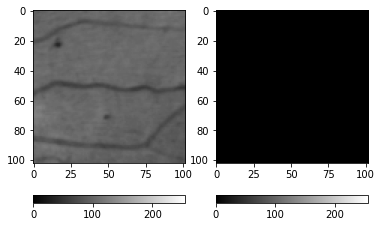

In [ ]:
im = data.microaneurysms()
k = -1 * np.ones((3,3))
k[1,1] = 8
imf = convolve(img_as_float(im), k)
imp = imf > 0.9 * imf.max()

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imp, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

# Line detection

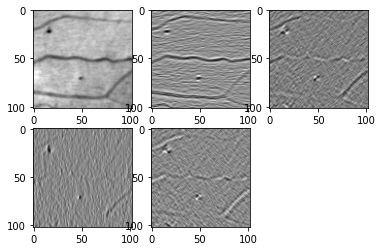

In [ ]:
im = data.microaneurysms()

k = -1 * np.ones((3,3))
k0 = k.copy()
k0[1,:] = 2
k2 = k.copy()
k2[:,1] = 2
k3 = k.copy()
np.fill_diagonal(k3, 2)
k1 = k3.copy()
k1 = np.fliplr(k1)

imf0 = convolve(img_as_float(im), k0)
imf1 = convolve(img_as_float(im), k1)
imf2 = convolve(img_as_float(im), k2)
imf3 = convolve(img_as_float(im), k3)

fig = plt.figure()
ax = fig.add_subplot(2, 3, 1)
p = plt.imshow(im, cmap='gray')
ax = fig.add_subplot(2, 3, 2)
p = plt.imshow(imf0, cmap='gray')
ax = fig.add_subplot(2, 3, 3)
p = plt.imshow(imf1, cmap='gray')
ax = fig.add_subplot(2, 3, 4)
p = plt.imshow(imf2, cmap='gray')
ax = fig.add_subplot(2, 3, 5)
p = plt.imshow(imf3, cmap='gray')

# Edge detection

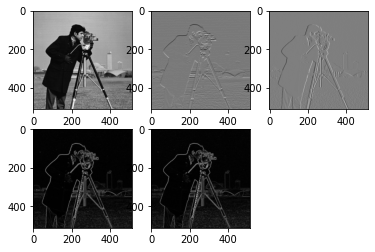

In [ ]:
im = data.camera()

imgx = sobel_h(im)
imgy = sobel_v(im)
img = sobel(im)
imgr = roberts(im)

fig = plt.figure()
ax = fig.add_subplot(2, 3, 1)
p = plt.imshow(im, cmap='gray')
ax = fig.add_subplot(2, 3, 2)
p = plt.imshow(imgx, cmap='gray')
ax = fig.add_subplot(2, 3, 3)
p = plt.imshow(imgy, cmap='gray')
ax = fig.add_subplot(2, 3, 4)
p = plt.imshow(img, cmap='gray')
ax = fig.add_subplot(2, 3, 5)
p = plt.imshow(imgr, cmap='gray')

# Edge detection - Laplacian

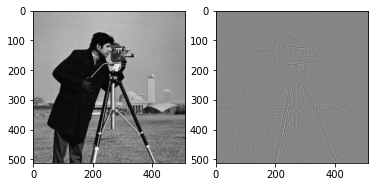

In [ ]:
im = data.camera()

iml = laplace(im, ksize=10)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(iml, cmap='gray')

# Basic Threshold

101.98034790209195
91.79847700039974
88.59251602169817
87.96379671902227
87.76400903673864
87.76400903673864


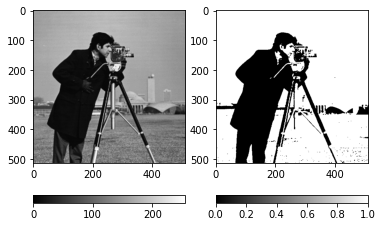

In [ ]:
im = data.camera()

v = np.concatenate(im)
t = v.mean()
d = np.inf
ds = 0.1
while d > ds:
  g1 = v[v>t]
  g2 = v[v<=t]
  m1 = g1.mean()
  m2 = g2.mean()
  tp = (m1 + m2)/2
  d = np.abs(t - tp)
  t = tp
  print(t)

imt = im > t

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

# Threshold

87


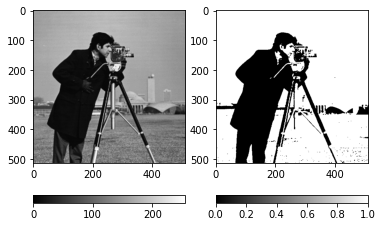

In [ ]:
im = data.camera()

t = threshold_otsu(im)
print(t)
imt = im > t

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

# Region growing

In [ ]:
def get8n(x, y, shape):
  out = []
  maxx = shape[1]-1
  maxy = shape[0]-1

  #top left
  outx = min(max(x-1,0),maxx)
  outy = min(max(y-1,0),maxy)
  out.append((outx,outy))

  #top center
  outx = x
  outy = min(max(y-1,0),maxy)
  out.append((outx,outy))

  #top right
  outx = min(max(x+1,0),maxx)
  outy = min(max(y-1,0),maxy)
  out.append((outx,outy))

  #left
  outx = min(max(x-1,0),maxx)
  outy = y
  out.append((outx,outy))

  #right
  outx = min(max(x+1,0),maxx)
  outy = y
  out.append((outx,outy))

  #bottom left
  outx = min(max(x-1,0),maxx)
  outy = min(max(y+1,0),maxy)
  out.append((outx,outy))

  #bottom center
  outx = x
  outy = min(max(y+1,0),maxy)
  out.append((outx,outy))

  #bottom right
  outx = min(max(x+1,0),maxx)
  outy = min(max(y+1,0),maxy)
  out.append((outx,outy))

  return out

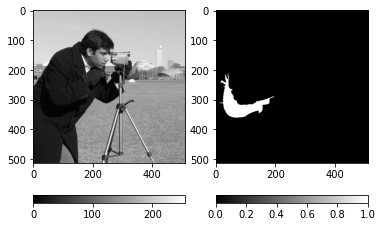

In [23]:
im = data.camera()

t = threshold_otsu(im) * 0.15

x0 = 321
y0 = 128
coords = []
processed = []
coords.append((x0, y0))
imtr = np.zeros_like(im>0)
while(len(coords) > 0):
  pix = coords[0]
  imtr[pix[0], pix[1]] = 1
  for pix8n in get8n(pix[0], pix[1], im.shape):
    if im[pix8n[0], pix8n[1]] < t:
      imtr[pix8n[0], pix8n[1]] = 1
      if not pix8n in processed:
        coords.append(pix8n)
      processed.append(pix8n)
  coords.pop(0)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imtr, cmap='gray')
c = plt.colorbar(orientation='horizontal')